# Image-Recognition algorithm that can correctly classify pictures as cat or non-cat



In [2]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage


We have two files, one contains training dataset and one train dataset, we will read them here using h5py.
PIL and scipy are used here to test our model with our own picture at the end.



In [28]:
 train_dataset = h5py.File('G:\ML\catClassifier\datasets/train_catvnoncat.h5', "r")
 train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # train set features
 train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # train set labels
 #a_group_key = list(train_dataset.keys())[2]
 #data = list(train_dataset[a_group_key])
 #print("Keys: %s" % train_dataset.keys())

 test_dataset = h5py.File('G:\ML\catClassifier\datasets/test_catvnoncat.h5', "r")
 test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # test set features
 test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # test set labels

 classes = np.array(test_dataset["list_classes"][:]) # the list of classes
 train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
 test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
 print("output: %s" %  train_set_x_orig[0].size)

output: 12288


Here we have 209 images. 
Problem Statement: we are given a dataset containing:
- a training set of m_train images labeled as cat (y=1) or non-cat (y=0)
- a test set of m_test images labeled as cat or non-cat
- each image is of shape (num_px, num_px, 3) where 3 is for the 3 channels (RGB).

In [60]:
index = 200
example = train_set_x_orig[index]

#print("output: %s" %  train_set_x_orig[index])

plt.imshow(train_set_x_orig[index])
plt.show()
print ("y = " + str(train_set_y_orig[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y_orig[:, index])].decode("utf-8") 
       +  "' picture.")

y = [1], it's a 'cat' picture.


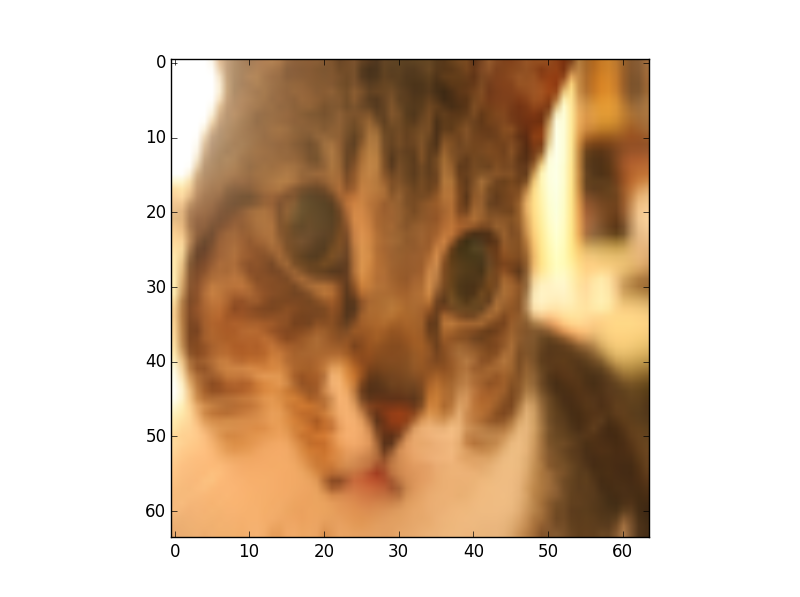



 m_train (number of training examples)
 m_test (number of test examples)
 num_px (= height = width of a training image)
 train_set_x_orig is a numpy-array of shape (m_train, num_px, num_px, 3)



In [39]:
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]
print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y_orig.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y_orig.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)




For convenience, we should now reshape images of shape (num_px, num_px, 3) in a numpy-array of shape (num_px $*$ num_px $*$ 3, 1). After this, our training (and test) dataset is a numpy-array where each column represents a flattened image. There should be m_train (respectively m_test) columns.

Reshape the training and test data sets so that images of size (num_px, num_px, 3) are flattened into single vectors of shape (num_px $*$ num_px $*$ 3, 1).

A trick when you want to flatten a matrix X of shape (a,b,c,d) to a matrix X_flatten of shape (b$*$c$*$d, a) is to use:

X_flatten = X.reshape(X.shape[0], -1).T  




In [42]:
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y_orig.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y_orig.shape))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)





[-To represent color images, the red, green and blue channels (RGB) must be specified for each pixel, and so the pixel value is actually a vector of three numbers ranging from 0 to 255.

- One common preprocessing step in machine learning is to center and standardize our dataset, meaning that we substract the mean of the whole numpy array from each example, and then divide each example by the standard deviation of the whole numpy array. But for picture datasets, it is simpler and more convenient and works almost as well to just divide every row of the dataset by 255 (the maximum value of a pixel channel).

- Purpose is to put all variables on same scale, one example to understand it- The numerical values of mean temperature depends on whether we use Fahrenheit or Celsius scale, or some other. By subtracting the mean, we remove the influence of that choice. But the choice of unit is still visible in the data because the notion of "1 degree change of temperature" is different on different scales. Division by σ removes the units: we get a unitless quantity ("z-score") which is independent of the temperature scale used. 



In [43]:
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.
len(train_set_x)

12288




Common steps for pre-processing a new dataset are:

-Figure out the dimensions and shapes of the problem (m_train, m_test, num_px, ...)
-Reshape the datasets such that each example is now a vector of size (num_px * num_px * 3, 1)
-"Standardize" the data



# learn the model


Key steps:
- Initialize the parameters of the model
- Learn the parameters for the model by minimizing the cost  
- Use the learned parameters to make predictions (on the test set)
- Analyse the results and conclude

 
# Building the parts of our algorithm
The main steps for building a Neural Network are:

Define the model structure (such as number of input features)
Initialize the model's parameters
Loop:
- Calculate current loss (forward propagation)
- Calculate current gradient (backward propagation)
- Update parameters (gradient descent)

In [48]:
# GRADED FUNCTION: sigmoid

def sigmoid(z):
    s = 1. / ( 1 + np.exp(-z))
    return s

# Initializing parameters

In [44]:
def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    
    w = np.zeros(shape=(dim, 1), dtype=np.float32)
    b = 0

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [45]:
dim = 2
w, b = initialize_with_zeros(dim)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[ 0.]
 [ 0.]]
b = 0





For image inputs, w will be of shape (num_px $\times$ num_px $\times$ 3, 1).

# Forward and Backward propagation
Now that our parameters are initialized, we can do the "forward" and "backward" propagation steps for learning the parameters.

Implement a function propagate() that computes the cost function and its gradient.

Forward Propagation:

 - get X
 - compute $A = \sigma(w^T X + b) = (a^{(0)}, a^{(1)}, ..., a^{(m-1)}, a^{(m)})$
 - calculate the cost function: $J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})$
- Here are the two formulas we will be using:

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T\tag{7}$$$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})\tag{8}$$

In [46]:
def propagate(w, b, X, Y):
    
    """
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    """
    
    m = X.shape[1]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    A = sigmoid(np.dot(w.T, X) + b)             
    cost = (-1. / m) * np.sum((Y*np.log(A) + (1 - Y)*np.log(1-A)), axis=1)     # compute cost

   
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    
    dw = (1./m)*np.dot(X,((A-Y).T))
    db = (1./m)*np.sum(A-Y, axis=1)
   

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [49]:
w, b, X, Y = np.array([[1],[2]]), 2, np.array([[1,2],[3,4]]), np.array([[1,0]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[ 0.99993216]
 [ 1.99980262]]
db = [ 0.49993523]
cost = 6.000064773192205




# Optimization
- we have initialized the parameters.
- we are also able to compute a cost function and its gradient.
- Now, we want to update the parameters using gradient descent.
- now we will write the optimization function. The goal is to learn $w$ and $b$ by minimizing the cost function $J$.
- For a parameter $\theta$, the update rule is $ \theta = \theta - \alpha \text{ } d\theta$, where $\alpha$ is the learning rate.

In [52]:
# GRADED FUNCTION: optimize

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    Steps:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """
    
    costs = []
    
    for i in range(num_iterations):
        grads, cost = propagate(w=w, b=b, X=X, Y=Y)
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        w = w - learning_rate*dw
        b = b -  learning_rate*db
        
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training examples
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [53]:
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

w = [[ 0.1124579 ]
 [ 0.23106775]]
b = [ 1.55930492]
dw = [[ 0.90158428]
 [ 1.76250842]]
db = [ 0.43046207]




The previous function will output the learned w and b. We are able to use w and b to predict the labels for a dataset X. Implement the predict() function. There is two steps to computing predictions:

Calculate $\hat{Y} = A = \sigma(w^T X + b)$

Convert the entries of a into 0 (if activation <= 0.5) or 1 (if activation > 0.5), stores the predictions in a vector Y_prediction. 

In [54]:
# GRADED FUNCTION: predict

def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
   
    A = sigmoid(np.dot(w.T, X) + b)
 
    
    [print(x) for x in A]
    for i in range(A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
       
        if A[0, i] >= 0.5:
            Y_prediction[0, i] = 1
            
        else:
            Y_prediction[0, i] = 0
       
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [55]:
print ("predictions = " + str(predict(w, b, X)))

[ 0.99987661  0.99999386]
predictions = [[ 1.  1.]]


 # Merge all functions into a model

 Implement the model function. Use the following notation:

- Y_prediction for  predictions on the test set
- Y_prediction_train for predictions on the train set
- w, costs, grads for the outputs of optimize()

In [56]:
# GRADED FUNCTION: model

def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    Builds the logistic regression model by calling the function we've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    # initialize parameters with zeros
    w, b = initialize_with_zeros(X_train.shape[0])
    # Gradient descent 
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples 
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [58]:
d = model(train_set_x, train_set_y_orig, test_set_x, test_set_y_orig, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584508
Cost after iteration 200: 0.466949
Cost after iteration 300: 0.376007
Cost after iteration 400: 0.331463
Cost after iteration 500: 0.303273
Cost after iteration 600: 0.279880
Cost after iteration 700: 0.260042
Cost after iteration 800: 0.242941
Cost after iteration 900: 0.228004
Cost after iteration 1000: 0.214820
Cost after iteration 1100: 0.203078
Cost after iteration 1200: 0.192544
Cost after iteration 1300: 0.183033
Cost after iteration 1400: 0.174399
Cost after iteration 1500: 0.166521
Cost after iteration 1600: 0.159305
Cost after iteration 1700: 0.152667
Cost after iteration 1800: 0.146542
Cost after iteration 1900: 0.140872
[ 0.94366988  0.86095311  0.88896715  0.93630641  0.74075403  0.52849619
  0.03094677  0.85707681  0.88457925  0.67279696  0.26601085  0.4823794
  0.74741157  0.78575729  0.00978911  0.9203284   0.02453695  0.84884703
  0.2050248   0.03703224  0.92931392  0.11930532  0.01411064  0.7832698
  



# Comment:
Training accuracy is close to 100%. This is a good sanity check: model is working and has high enough capacity to fit the training data. Test error is 68%. It is actually not bad for this simple model, given the small dataset we used and that logistic regression is a linear classifier. 

In [59]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

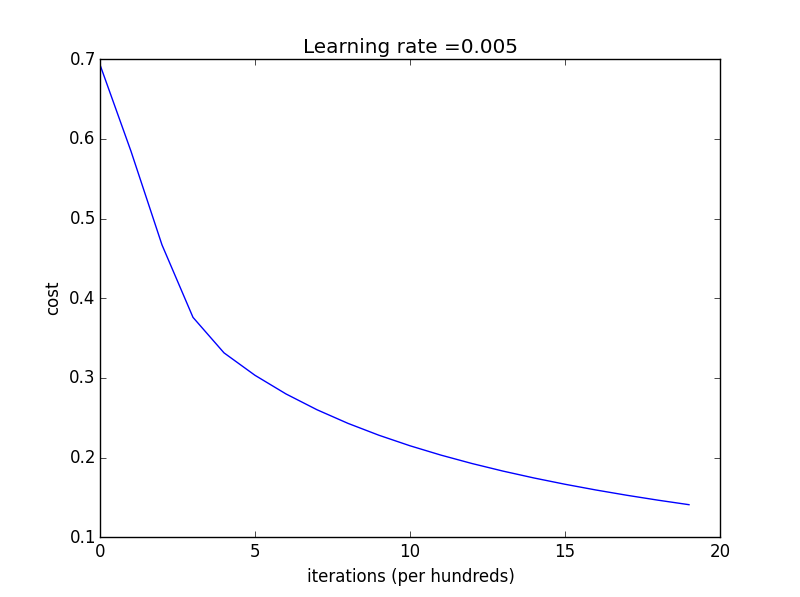




# Interpretation: 
we can see the cost decreasing. It shows that the parameters are being learned. However, we see that we could train the model even more on the training set. Try to increase the number of iterations in the cell above and rerun the cells. we might see that the training set accuracy goes up, but the test set accuracy goes down. This is called overfitting.

# Further analysis:
now we will examine possible choices for the learning rate $\alpha$.
- In order for Gradient Descent to work we must choose the learning rate wisely. The learning rate $\alpha$ determines how rapidly we update the parameters. If the learning rate is too large we may "overshoot" the optimal value. Similarly, if it is too small we will need too many iterations to converge to the best values. That's why it is crucial to use a well-tuned learning rate.

In [64]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(train_set_x, train_set_y_orig, test_set_x, test_set_y_orig, num_iterations = 1500, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

learning rate is: 0.01
[ 0.97125943  0.9155338   0.92079132  0.96358044  0.78924234  0.60411297
  0.01179527  0.89814048  0.91522859  0.70264065  0.19380387  0.49537355
  0.7927164   0.85423431  0.00298587  0.96199699  0.01234735  0.9107653
  0.13661137  0.01424336  0.96894735  0.1033746   0.00579297  0.86081326
  0.53811196  0.64950178  0.83272843  0.00426307  0.0131452   0.99947804
  0.11468372  0.82182442  0.69611733  0.4991522   0.67231401  0.01728165
  0.04136099  0.80069693  0.26832359  0.03958566  0.74731239  0.32116434
  0.71871197  0.01205725  0.96879962  0.62310364  0.17737126  0.98960523
  0.74697265  0.07284605]
[  1.47839654e-01   5.78008187e-02   9.42385025e-01   4.14849240e-05
   2.27209941e-02   7.29254668e-02   2.23704495e-02   9.49717864e-01
   5.41724296e-02   2.92729895e-02   6.82412299e-02   8.33370210e-01
   1.71420615e-01   9.66879883e-01   8.11537151e-01   2.44343483e-02
   7.87634098e-03   2.64027272e-02   5.60720049e-02   9.53130353e-01
   5.30865324e-03   3.1

  0.40733226  0.28828383]
[ 0.4225819   0.31692389  0.42964509  0.14896683  0.28783033  0.38652698
  0.29492571  0.44991522  0.31988018  0.32391139  0.39318147  0.34804173
  0.40099138  0.31694856  0.28102266  0.3231201   0.25486297  0.18485428
  0.31900054  0.52941528  0.25568417  0.27297382  0.29762542  0.35834172
  0.38912252  0.4552143   0.2555983   0.34830216  0.29078565  0.27432926
  0.31094887  0.44330557  0.47172673  0.39765449  0.22386371  0.46108148
  0.27055987  0.31333951  0.49901097  0.439851    0.23953174  0.29809115
  0.42197081  0.28385499  0.2465556   0.40478121  0.35487343  0.45521241
  0.1451398   0.37485678  0.36671611  0.37909623  0.30298036  0.40151709
  0.40460677  0.24757226  0.50122617  0.38917296  0.3687779   0.50666786
  0.52492017  0.37864634  0.24031899  0.30627306  0.35114005  0.37398054
  0.43104844  0.31851314  0.37029232  0.29232461  0.37616632  0.52373453
  0.32507684  0.48381803  0.39170698  0.38646363  0.17397111  0.31623794
  0.24714356  0.35235176 

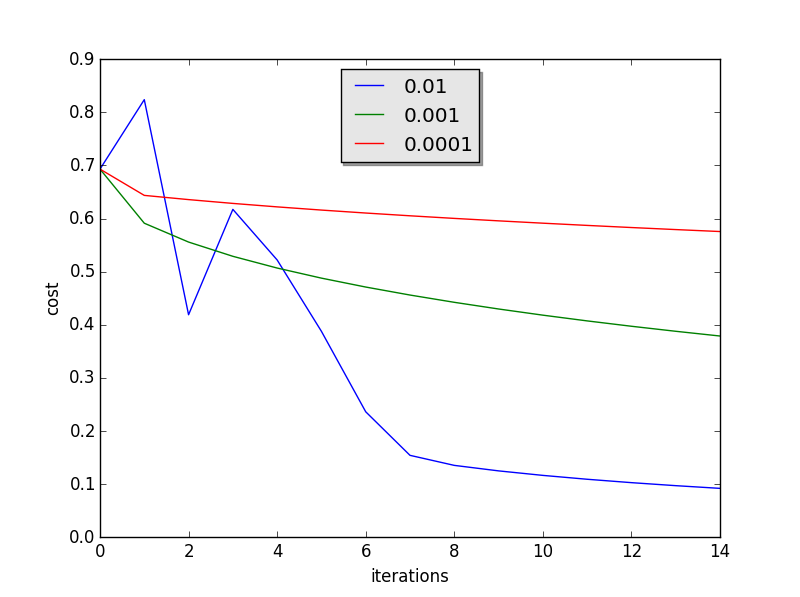


# Interpretation:

- Different learning rates give different costs and thus different predictions results.
- If the learning rate is too large (0.01), the cost may oscillate up and down. It may even diverge (though in this example, using 0.01 still eventually ends up at a good value for the cost).
- A lower cost doesn't mean a better model. we have to check if there is possibly overfitting. It happens when the training accuracy is a lot higher than the test accuracy.
In deep learning, we should:
- Choose the learning rate that better minimizes the cost function.
- If our model overfits, use other techniques to reduce overfitting. 



# Test with our own image

In [69]:
 my_image = "G:\ML\catClassifier\plots/test.jpg"  

# We preprocess the image 
fname = my_image
image = np.array(ndimage.imread(my_image, flatten=False))
my_image = scipy.misc.imresize(image, size=(num_px,num_px)).reshape((1, num_px*num_px*3)).T
my_predicted_image = predict(d["w"], d["b"], my_image)

plt.imshow(image)
plt.show()
print("y = " + str(np.squeeze(my_predicted_image)) + ", our algorithm predicts a \"" +
      classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")

[  1.40047715e-107]
y = 0.0, our algorithm predicts a "non-cat" picture.


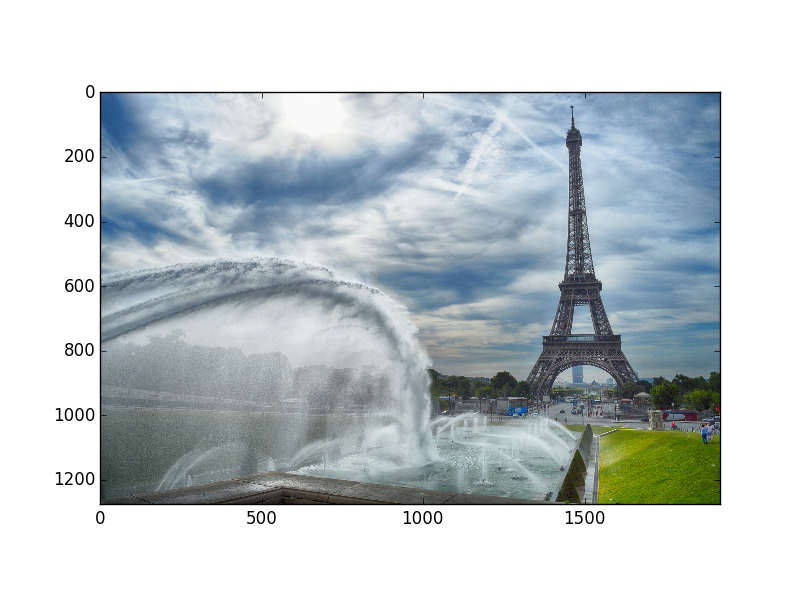



# Conclusion
- Preprocessing the dataset is important.
- we implemented each function separately: initialize(), propagate(), optimize(), predict(). Then we built a model().
- Tuning the learning rate or no. of iterations can make a big difference to the algorithm.